## Parte 1: Preparación y Exploración de Datos (20%) 	

### 1.1 Carga de Datos (5%)

Importar las librerías necesarias: pandas, numpy, sklearn, cufflinks, etc.
Cargar un conjunto de datos mínimo de 20 variables proporcionado o de un repositorio público: Kaggle Datasets, UCI Machine Learning Repository, Google Dataset Search, GitHub - Awesome Public Datasets, Scikit-learn Datasets.
Realizar una breve exploración y limpieza de los datos: tratamiento de valores nulos y valores extremos, revisión de tipos de datos.

### Contexto del data set bankruptcy of Polish Companies

- Son 5 archivos que corresponden a 5 conjuntos de datos distintos. Estos archivos se recolectaron en 5 momentos diferentes  correspondiente a los años fiscales anteriores a la posible quiebra de las empresas. Se reacabaron reportes financieros de empresas de la Union Europea, específicamente de Polonia.

- Este conjunto de datos es como una bola de cristal financiera que usamos para ver si una empresa polaca va a quebrar. El truco es que no solo intentamos predecir si quiebra en el próximo año, sino en una ventana de hasta cinco años en el futuro. Para lograr esto, tenemos cinco archivos diferentes, donde cada uno representa un "horizonte de tiempo" distinto: el archivo más importante (el más "actualizado") usa la información de la empresa de solo un año antes de la quiebra real, mientras que el más antiguo usa los datos de cinco años antes. El gran desafío de este ejercicio es confirmar lo que ya sospechamos: cuanto más vieja sea la información financiera de la empresa (es decir, cuanto más lejos miremos en el tiempo), más difícil se vuelve acertar si terminará en bancarrota o no.

- Problema de Claisificación Binaria.

In [1]:
# importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cufflinks as cf

from scipy.io import arff
import os
import io

### Dataset Information
#### Additional Information

The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
    
- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
    
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
    
- 3rdYear â€“ the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.

- 4thYear â€“ the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
    
- 5thYear â€“ the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instance (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

# Glossary

- X1	net profit / total assets
- X2	total liabilities / total assets
- X3	working capital / total assets
- X4	current assets / short-term liabilities
- X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- X6	retained earnings / total assets
- X7	EBIT / total assets
- X8	book value of equity / total liabilities
- X9	sales / total assets
- X10	equity / total assets
- X11	(gross profit + extraordinary items + financial expenses) / total assets
- X12	gross profit / short-term liabilities
- X13	(gross profit + depreciation) / sales
- X14	(gross profit + interest) / total assets
- X15	(total liabilities * 365) / (gross profit + depreciation)
- X16	(gross profit + depreciation) / total liabilities
- X17	total assets / total liabilities
- X18	gross profit / total assets
- X19	gross profit / sales
- X20	(inventory * 365) / sales
- X21	sales (n) / sales (n-1)
- X22	profit on operating activities / total assets
- X23	net profit / sales
- X24	gross profit (in 3 years) / total assets
- X25	(equity - share capital) / total assets
- X26	(net profit + depreciation) / total liabilities
- X27	profit on operating activities / financial expenses
- X28	working capital / fixed assets
- X29	logarithm of total assets
- X30	(total liabilities - cash) / sales
- X31	(gross profit + interest) / sales
- X32	(current liabilities * 365) / cost of products sold
- X33	operating expenses / short-term liabilities
- X34	operating expenses / total liabilities
- X35	profit on sales / total assets
- X36	total sales / total assets
- X37	(current assets - inventories) / long-term liabilities
- X38	constant capital / total assets
- X39	profit on sales / sales
- X40	(current assets - inventory - receivables) / short-term liabilities
- X41	total liabilities / ((profit on operating activities + depreciation) * (12/365))
- X42	profit on operating activities / sales
- X43	rotation receivables + inventory turnover in days
- X44	(receivables * 365) / sales
- X45	net profit / inventory
- X46	(current assets - inventory) / short-term liabilities
- X47	(inventory * 365) / cost of products sold
- X48	EBITDA (profit on operating activities - depreciation) / total assets
- X49	EBITDA (profit on operating activities - depreciation) / sales
- X50	current assets / total liabilities
- X51	short-term liabilities / total assets
- X52	(short-term liabilities * 365) / cost of products sold)
- X53	equity / fixed assets
- X54	constant capital / fixed assets
- X55	working capital
- X56	(sales - cost of products sold) / sales
- X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- X58	total costs /total sales
- X59	long-term liabilities / equity
- X60	sales / inventory
- X61	sales / receivables
- X62	(short-term liabilities *365) / sales
- X63	sales / short-term liabilities
- X64	sales / fixed assets

In [2]:
# carga de datos desde un archivo ARFF
data_arff, meta = arff.loadarff('../Datos/1year.arff')

In [3]:
# conversión a DataFrame de pandas
df_ejemplo = pd.DataFrame(data_arff)
df_ejemplo.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class  
0   82.658  4.4158   7.4277   b'0'  
1  107.350  3.4000  60.9870   b'0'  
2  134.270  2.7185   5.2078   b'0'  
3   86.435  4.2228   5.5497   b'0'  
4  127.210  2.8692   7.8980   b'0'  

[5 rows x 65 columns]

In [5]:
# Define las rutas y nombres de los archivos ARFF
FOLDER_PATH = '../Datos' # Nombre de la carpeta que contiene los archivos

'''Attribute-Relation File Format (ARFF) es un formato de archivo utilizado para describir conjuntos 
de datos en el contexto del aprendizaje automático. Fue desarrollado para su uso con el software WEKA (Waikato Environment for Knowledge Analysis) y es ampliamente 
utilizado en la comunidad de aprendizaje automático.'''


archivos_arff = [
    '1year.arff',
    '2year.arff',
    '3year.arff',
    '4year.arff',
    '5year.arff'
]

lista_df = []


# --- 2. CARGA Y PROCESAMIENTO DE ARCHIVOS ARFF ---
print(f"Iniciando la carga y combinación de {len(archivos_arff)} archivos ARFF desde la carpeta '{FOLDER_PATH}'...")

for i, archivo in enumerate(archivos_arff):
    ruta_completa = os.path.join(FOLDER_PATH, archivo)
    try:
        # Cargar el archivo ARFF
        data_arff, meta = arff.loadarff(ruta_completa)
        
        # Convertir el array estructurado de NumPy a DataFrame de Pandas
        df = pd.DataFrame(data_arff)

        # La mayoría de las columnas son de tipo bytes (object) en ARFF. 
        # Forzamos la decodificación y conversión a numérico.
        for col in df.columns:
            if df[col].dtype == object:
                 df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
        
        # Convertir todas las columnas (excepto la última, que es la clase) a float64, 
        # ya que los datos ya están decodificados o son numéricos.
        # Las variables financieras pueden tener valores faltantes (NaN) que Pandas maneja como float.
        
        # Añadir la columna 'year' (índice 65 en el DF final)
        df['year'] = i + 1 
        
        lista_df.append(df)
        print(f"Cargado y procesado: {archivo} con {len(df)} filas.")
        
    except FileNotFoundError:
        print(f"ERROR: Archivo '{ruta_completa}' no encontrado. Verifica la carpeta y el nombre del archivo.")
        continue 
    except Exception as e:
        print(f" ERROR inesperado al procesar {archivo}: {e}")
        continue

# --- 3. COMBINACIÓN FINAL ---
df_raw_completo = pd.concat(lista_df, ignore_index=True)

# --- 4. ASIGNACIÓN DE NOMBRES DE COLUMNA ---
# Renombramos las columnas numéricas (0 a 64) y la de clase (65).
num_features = 64
nuevos_nombres = {i: f'X{i+1}' for i in range(num_features)}
# La columna 64 es la clase, que es la penúltima columna en el DataFrame combinado.
clase_original_index = df_raw_completo.shape[1] - 2 
nuevos_nombres[clase_original_index] = 'class'

df_raw_completo = df_raw_completo.rename(columns=nuevos_nombres)

# --- 5. VERIFICACIÓN FINAL ---
print("\n--- OBJETIVO: DATAFRAME RAW COMPLETO CREADO ---")
print(f"Dimensiones finales (Filas, Columnas): {df_raw_completo.shape}")
print("-" * 50)

# Verificación de valores faltantes (la "suciedad")
#print("Valores faltantes por columna (Top 10):")
#print(df_raw_completo.isnull().sum().sort_values(ascending=False).head(10))

Iniciando la carga y combinación de 5 archivos ARFF desde la carpeta '../Datos'...
Cargado y procesado: 1year.arff con 7027 filas.
Cargado y procesado: 2year.arff con 10173 filas.
Cargado y procesado: 3year.arff con 10503 filas.
Cargado y procesado: 4year.arff con 9792 filas.
Cargado y procesado: 5year.arff con 5910 filas.

--- OBJETIVO: DATAFRAME RAW COMPLETO CREADO ---
Dimensiones finales (Filas, Columnas): (43405, 66)
--------------------------------------------------


In [6]:
# Estrutura del DataFrame final
print("\nEstructura del DataFrame final:")
print(df_raw_completo.info())


Estructura del DataFrame final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  At

In [8]:
# Porcentaje de Nulos

total_filas = df_raw_completo.shape[0]
nulos_porcentaje = (df_raw_completo.isnull().sum() / total_filas) * 100

# completitud 
completitud = 100 - nulos_porcentaje.sort_values(ascending=True)

# Convertir a DataFrame para mejor visualización
df_completitud = completitud.to_frame(name='Completitud (%)')

print(df_completitud[df_completitud['Completitud (%)']>= 0].sort_values(
    by='Completitud (%)', 
    ascending=False
).to_markdown(floatfmt=".2f"))

df_completitud[df_completitud['Completitud (%)']>= 0].size



|        |   Completitud (%) |
|:-------|------------------:|
| year   |            100.00 |
| class  |            100.00 |
| Attr55 |            100.00 |
| Attr59 |             99.98 |
| Attr57 |             99.98 |
| Attr18 |             99.98 |
| Attr10 |             99.98 |
| Attr3  |             99.98 |
| Attr7  |             99.98 |
| Attr6  |             99.98 |
| Attr14 |             99.98 |
| Attr1  |             99.98 |
| Attr2  |             99.98 |
| Attr22 |             99.98 |
| Attr29 |             99.98 |
| Attr35 |             99.98 |
| Attr36 |             99.98 |
| Attr38 |             99.98 |
| Attr51 |             99.98 |
| Attr25 |             99.98 |
| Attr48 |             99.98 |
| Attr9  |             99.98 |
| Attr15 |             99.92 |
| Attr11 |             99.90 |
| Attr58 |             99.81 |
| Attr5  |             99.79 |
| Attr8  |             99.78 |
| Attr17 |             99.78 |
| Attr50 |             99.78 |
| Attr34 |             99.78 |
| Attr26

66

#### El atributo 37 que corresponde a (current assets - inventories) / long-term liabilities tiene una completitud de 56.26%

In [9]:
# 1. Aseguramos que todas las columnas X sean numéricas.
columnas_X = [f'Attr{i}' for i in range(1, 65)]

# Usamos pd.to_numeric con errors='coerce' para convertir cualquier 
# valor que no sea un número (como cadenas o bytes residuales) en NaN.
df_raw_completo[columnas_X] = df_raw_completo[columnas_X].apply(pd.to_numeric, errors='coerce')

# 2. Ahora, el código para contar infinitos funcionará:
import numpy as np
infinitos_por_columna = df_raw_completo[columnas_X].apply(lambda x: np.isinf(x).sum())

# 3. Mostrar las columnas que tienen infinitos
df_infinitos = infinitos_por_columna[infinitos_por_columna > 0].sort_values(ascending=False)

print("--- Conteo de Valores Infinitos por Columna ---")
if df_infinitos.empty:
    print("No se encontraron valores infinitos en las variables X")
else:
    print(df_infinitos.to_markdown(numalign="right"))

--- Conteo de Valores Infinitos por Columna ---
No se encontraron valores infinitos en las variables X


In [ ]:
# boxplots de las variables Attr
for col in columnas_X:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_raw_completo[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [10]:
# Importanta la varible class porque define el target. voy a contar qu{e porcentaje es 0 y qu{e porcentaje es 1
print("\n--- DISTRIBUCIÓN DE LA VARIABLE TARGET 'class' ---")
print(df_raw_completo['class'].value_counts(normalize=False).to_markdown(floatfmt=".0f"))
print(df_raw_completo['class'].value_counts(normalize=True).to_markdown(floatfmt=".3f"))


--- DISTRIBUCIÓN DE LA VARIABLE TARGET 'class' ---
|   class |   count |
|--------:|--------:|
|       0 |   41314 |
|       1 |    2091 |
|   class |   proportion |
|--------:|-------------:|
|       0 |        0.952 |
|       1 |        0.048 |


### Hallazgos de los Datos

- Con excepción de dos atributos (el atributo 21 y 37) la completitud supera el 93%
- El Atributo 37 tiene un 43.7% de valores nulos.
- No hay valores infinitos.
- Todas las columnas tienen valores fuera del IQR.
- Nota que la varible class está desbalanceada. esto es, 95.2% de las empresas sovbrevivieron mientras que el 4.8% se declararon en quiebra. 

### Siguiente paso:
- Imputar mediana a valores faltantes.
- Hacer una winsorización para tratar valores extremos

### Tratamiento de Nulos

In [11]:
# Tratamiento de valores Nulos

# Nombre de las columnas seleccionadas
columnas_Attr = [f'Attr{i}' for i in range(1, 65)]

# Mediana de dada columna
mediana = df_raw_completo[columnas_Attr].median()

# Reemplazo de valores nulos con la mediana correspondiente
df_raw_completo[columnas_Attr] = df_raw_completo[columnas_Attr].fillna(mediana)

In [12]:

# Verificación final después del tratamiento de nulos
print("\n--- VERIFICACIÓN FINAL DESPUÉS DEL TRATAMIENTO DE NULOS ---")
print("Valores faltantes por columna (Top 10):")
df_raw_completo.isnull().sum().sort_values(ascending=False)


--- VERIFICACIÓN FINAL DESPUÉS DEL TRATAMIENTO DE NULOS ---
Valores faltantes por columna (Top 10):


Attr1     0
Attr50    0
Attr36    0
Attr37    0
Attr38    0
         ..
Attr28    0
Attr29    0
Attr30    0
Attr31    0
year      0
Length: 66, dtype: int64

### Tratamiento de Outliers

In [13]:
# Para cada una de las columnas vamos a aplicar el proceso de windsorización para el tratamiento de outliers.

'''En lugar de eliminar las observaciones atípicas (como harías al recortar, o trimming),
 la Winsorización reemplaza los valores que caen por encima de un percentil superior 
 (ej. 95%) o por debajo de un percentil inferior (ej. 5%) con el valor de ese percentil. Con esto, 
 Mantienes el tamaño del conjunto de datos mientras reduces el impacto de los valores atípicos extremos.'''

# Nombre de las columnas del df
columnas_Attr = [f'Attr{i}' for i in range(1, 65)]

# creo una copia del df original para no modificarlo
df_winsorizado = df_raw_completo.copy()

# Fuerzo a tipo numérico
df_winsorizado[columnas_Attr] = df_winsorizado[columnas_Attr].apply(pd.to_numeric, errors='coerce')


# Aplicación de winsorización

for columna in columnas_Attr:
    Q1 = df_winsorizado[columna].quantile(0.25)
    Q3 = df_winsorizado[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Reemplazo de outliers
    df_winsorizado[columna] = np.where(
        df_winsorizado[columna] < lower_bound, 
        lower_bound, 
        np.where(
            df_winsorizado[columna] > upper_bound, 
            upper_bound, 
            df_winsorizado[columna]
        )
    )   

In [ ]:
# a cada columna le aplico un grafico de violín para ver la distribución después de la winsorización
import seaborn as sns
for columna in columnas_Attr:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df_winsorizado[columna])
    plt.title(f'Gráfico de Violín de {columna} después de Winsorización')
    plt.xlabel(columna)
    plt.grid(True)
    plt.show()
    

In [ ]:
# Ahora voy a verificar que no haya outliers en los boxplots

for col in columnas_X:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_winsorizado[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

#### Tratamiento de valores Nulos y atípicos concluido

In [20]:
# Después de la winsorización, vuelvo a añadir las columnas 'class' y 'year' al DataFrame winsorizado
df_winsorizado['class'] = df_raw_completo['class']
df_winsorizado['year'] = df_raw_completo['year']

df_winsorizado.head()

Attr1    Attr2    Attr3   Attr4    Attr5     Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.223603  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.000000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.000000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.149880  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.187320  0.187320  0.63070   

    Attr9   Attr10  ...    Attr57   Attr58    Attr59  Attr60  Attr61   Attr62  \
0  1.1389  0.50494  ...  0.397180  0.87804  0.001924  8.4160  5.1372   82.658   
1  1.6996  0.49788  ...  0.420020  0.85300  0.000000  4.1486  3.2732  107.350   
2  1.3090  0.30408  ...  0.689434  0.76599  0.589675  4.9909  3.9510  134.270   
3  1.0571  0.57353  ...  0.142070  0.94598  0.000000  4.5746  3.6147   86.435   
4  1.1559  0.38677  ...  0.484310  0.86515  0.124440  6.3985  4.3158  127.210   

   Attr63    Attr64  class  year  
0  4.4158   7.42770      0     1  
1  3.4000  20.58605      0     1  
2  2.7185   5.20780      0     1  
3  4.2228   5.54970      0     1  
4  2.8692   7.89800      0     1  

[5 rows x 66 columns]

In [17]:
'''# Ahora voy a aplicar un heatmap para ver la correlación entre las variables, pero quiero que el heatmap sea por la variable year
import seaborn as sns
for year in sorted(df_winsorizado['year'].unique()):
    plt.figure(figsize=(12, 10))
    subset = df_winsorizado[df_winsorizado['year'] == year]
    corr = subset[columnas_Attr].corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title(f'Heatmap de Correlación para el Año {year}')
    plt.show()'''

"# Ahora voy a aplicar un heatmap para ver la correlación entre las variables, pero quiero que el heatmap sea por la variable year\nimport seaborn as sns\nfor year in sorted(df_winsorizado['year'].unique()):\n    plt.figure(figsize=(12, 10))\n    subset = df_winsorizado[df_winsorizado['year'] == year]\n    corr = subset[columnas_Attr].corr()\n    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)\n    plt.title(f'Heatmap de Correlación para el Año {year}')\n    plt.show()"

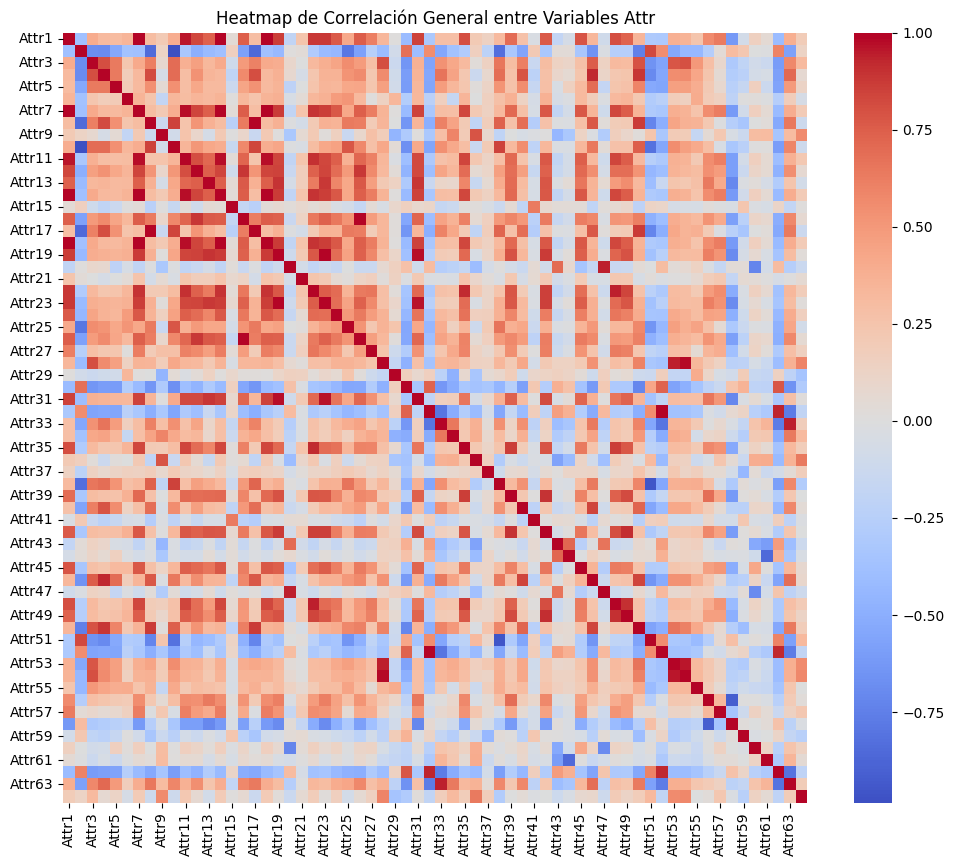

In [21]:
# voy a calcular un heatmap de correlación general entre todas las variables
plt.figure(figsize=(12, 10))
corr_general = df_winsorizado[columnas_Attr].corr()
sns.heatmap(corr_general, annot=False, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación General entre Variables Attr')
plt.show()

##### Hasta ahora, con la visual de este Heatmap es muy complicado establecer candidatos para reducción de dimensiones. A primera vista, hay una correlación muy fuerte entre Atrr1 con Attr7, Attr11, Attr14, Attr18, Attr23, Attr31. De esta manera, calculando el VIF se justifica un análisis de componentes principales.

In [19]:
# Vamos a hacer un análisis VIF (Variance Inflation Factor) para detectar multicolinealidad.
'''La métrica VIF (Factor de Inflación de Varianza) que planeamos calcular es el cálculo formal 
que cuantifica la severidad de la multicolinealidad (VIF > 10 indica un problema grave) y prueba la necesidad de usar PCA.'''

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


# ASUMIMOS que df_winsorized (limpio y winsorizado) está disponible.
columnas_Attr = [f'Attr{i}' for i in range(1, 65)]
X_winsorized = df_winsorizado[columnas_Attr].copy()

# 1. Estandarizar/Escalar los datos
print("Estandarizando las 64 variables (Media=0, Desviación Estándar=1)...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_winsorized)
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_X)

# 2. Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Feature"] = columnas_X

print("Calculando Factor de Inflación de Varianza (VIF)... Esto puede tomar un momento.")

# Iterar sobre las columnas de X_scaled_df para calcular el VIF
vif_list = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]
vif_data["VIF"] = vif_list

# 3. Mostrar los resultados
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

print("\n--- Top 10 Variables con Mayor Multicolinealidad (VIF) ---")
print("VIF > 10 indica multicolinealidad severa, justificando PCA/VarClusHi.")
print(vif_data_sorted.head(64).to_markdown(
    floatfmt=".2f", 
    numalign="right",
    stralign="left"
))



Estandarizando las 64 variables (Media=0, Desviación Estándar=1)...
Calculando Factor de Inflación de Varianza (VIF)... Esto puede tomar un momento.

--- Top 10 Variables con Mayor Multicolinealidad (VIF) ---
VIF > 10 indica multicolinealidad severa, justificando PCA/VarClusHi.
|    | Feature   |       VIF |
|---:|:----------|----------:|
| 13 | Attr14    | 290075.32 |
|  6 | Attr7     | 137145.16 |
| 17 | Attr18    |  30896.15 |
| 16 | Attr17    |    322.46 |
|  7 | Attr8     |    322.41 |
| 18 | Attr19    |    179.91 |
| 15 | Attr16    |    172.59 |
| 25 | Attr26    |    165.09 |
| 22 | Attr23    |    125.02 |
|  9 | Attr10    |    123.16 |
|  0 | Attr1     |    122.32 |
|  1 | Attr2     |    113.47 |
| 51 | Attr52    |     90.60 |
| 31 | Attr32    |     82.75 |
| 53 | Attr54    |     79.87 |
| 21 | Attr22    |     66.47 |
| 27 | Attr28    |     56.90 |
| 41 | Attr42    |     48.72 |
| 50 | Attr51    |     41.72 |
| 37 | Attr38    |     41.52 |
| 47 | Attr48    |     38.82 |
| 48 | A


## Multicolinealidad y Reducción de dimensiones

### Explicar el concepto de multicolinealidad y por qué es importante detectarla.

1. **Definición y Origen del Problema**

La multicolinealidad es un problema estadístico que surge cuando dos o más variables predictoras (en nuestro caso, los ratios financieros Attr_i) en un modelo de regresión lineal están altamente correlacionadas entre sí.

En el contexto de los ratios financieros, esto es natural: muchos ratios miden conceptos similares. Por ejemplo, si tenemos tres ratios que miden la liquidez o la rentabilidad, es muy probable que si una empresa tiene un valor alto en un ratio, también lo tenga en los otros. Esto significa que dos ratios están midiendo, esencialmente, la misma información. Si se conoce el valor de un ratio, se puede predecir el valor del otro con bastante precisión, haciendo que uno de ellos sea redundante para el modelo.

2. **Por Qué es Crítico Detectarla (Impacto en los Modelos)**

La detección y el tratamiento de la multicolinealidad son cruciales porque tiene un impacto directo en la robustez y la interpretabilidad de cualquier modelo predictivo o causal (especialmente la Regresión Logística, que es común para la predicción de quiebras):

 2.1 Inflación de Varianza e Inestabilidad: El problema más grave es que la multicolinealidad infla la varianza de los coeficientes de regresión (β). Esto significa que los coeficientes se vuelven inestables, cambiando drásticamente con pequeñas variaciones en los datos de entrada o incluso al añadir o eliminar una sola observación.

 2.2 Dificultad en la Interpretación Causal: Esta inestabilidad hace que sea casi imposible determinar la contribución individual de cada ratio a la predicción. Si dos ratios altamente correlacionados entran al modelo, el modelo puede asignar la importancia (el coeficiente β) de forma arbitraria entre ellos, llevando a coeficientes con signos inesperados o a conclusiones causales erróneas.

## Implementar VarClusHi para identificar grupos de variables altamente correlacionadas.

Inicializando VarClusHi y Ejecutando el análisis de grupos...
Análisis VarClusHi de grupos completado.

--- INSPECCIÓN DE COLUMNAS DE RESULTADOS ---
Columnas en vc.info (Estructura de Grupos):
['Cluster', 'N_Vars', 'Eigval1', 'Eigval2', 'VarProp']

Columnas en vc.rsquare (R^2 por Variable):
['Cluster', 'Variable', 'RS_Own', 'RS_NC', 'RS_Ratio']

Primeras filas de vc.rsquare:
   Cluster Variable    RS_Own     RS_NC  RS_Ratio
0        0    Attr1  0.908332  0.750650  0.367627
1        0    Attr7  0.932567  0.748114  0.267713
2        0   Attr11  0.912646  0.696440  0.287765
3        0   Attr14  0.932741  0.748231  0.267147
4        0   Attr18  0.932690  0.748135  0.267248
------------------------------------------


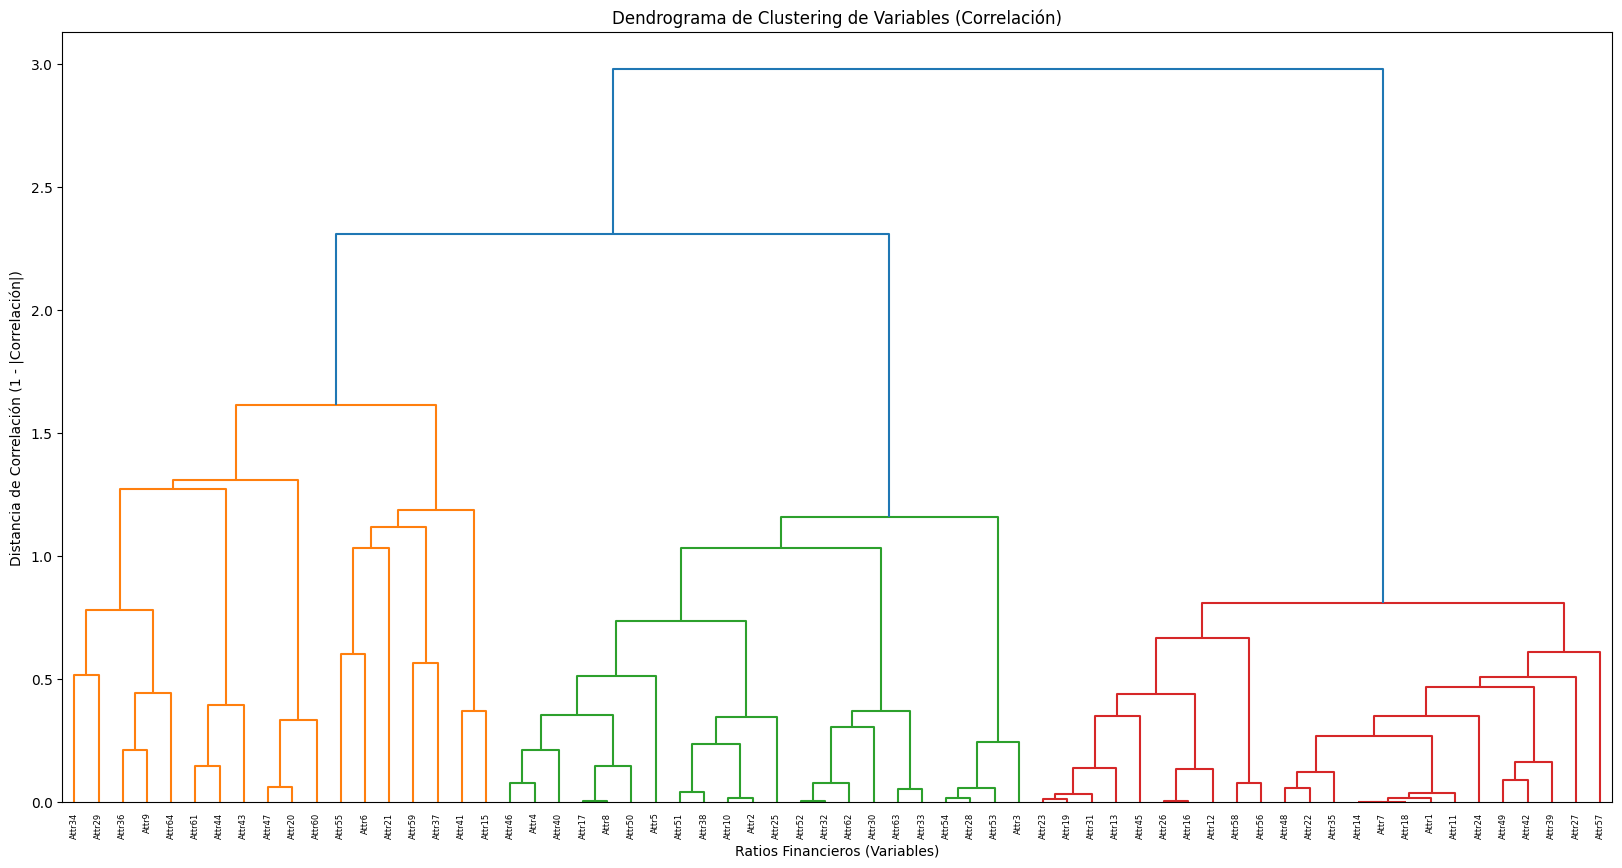


--- RESULTADOS DEL CLUSTERING ---
### 1. Estructura de Grupos Finales (vc.info) ###
   Cluster N_Vars    Eigval1   Eigval2   VarProp
0        0     16  11.567160  0.980586  0.722948
1        1      6   4.523000  0.762609  0.753833
2        2      4   3.140927  0.469040  0.785232
3        3      6   5.035538  0.483411  0.839256
4        4      4   3.641534  0.278863  0.910383
5        5      9   7.070788  0.942230  0.785643
6        6      2   1.628512  0.371488  0.814256
7        7      2   1.853015  0.146985  0.926507
8        8      3   1.771346  0.713220  0.590449
9        9      2   1.435064  0.564936  0.717532
10      10      2   1.787143  0.212857  0.893571
11      11      7   5.562350  0.630953  0.794621
12      12      1   1.000000  0.000000  1.000000


In [22]:
import pandas as pd
from varclushi import VarClusHi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import numpy as np

# --- CONFIGURACIÓN Y PREPARACIÓN DE DATOS ---

columnas_X = [f'Attr{i}' for i in range(1, 65)]
X_data = df_winsorizado[columnas_X].copy() 
# ... (Código de estandarización omitido por brevedad, asumiendo que funciona)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_X)


# --- ANÁLISIS VARCLUSHI (Identificación de Grupos) ---

print("Inicializando VarClusHi y Ejecutando el análisis de grupos...")
vc = VarClusHi(
    X_scaled_df, 
    maxeigval2=1 
)
vc.varclus() 
print("Análisis VarClusHi de grupos completado.")

# --- 🔎 PASO CLAVE PARA DEPURAR EL KEYERROR ---

print("\n--- INSPECCIÓN DE COLUMNAS DE RESULTADOS ---")
print("Columnas en vc.info (Estructura de Grupos):")
print(vc.info.columns.tolist())
print("\nColumnas en vc.rsquare (R^2 por Variable):")
print(vc.rsquare.columns.tolist())
print("\nPrimeras filas de vc.rsquare:")
print(vc.rsquare.head())
print("------------------------------------------")

# --- VISUALIZACIÓN DEL DENDROGRAMA (Asumiendo que el código de scipy funciona) ---
# ... (Código del dendrograma omitido por brevedad, asumiendo que funciona)
corr_matrix = X_scaled_df.corr().abs()
distance_matrix = 1 - corr_matrix
condensed_distance_vector = squareform(distance_matrix)
linked = linkage(condensed_distance_vector, method='ward') 

labels = X_scaled_df.columns.tolist()
plt.figure(figsize=(20, 10))
plt.title('Dendrograma de Clustering de Variables (Correlación)')
plt.xlabel('Ratios Financieros (Variables)')
plt.ylabel('Distancia de Correlación (1 - |Correlación|)')
dendrogram(
    linked, 
    orientation='top',
    labels=labels,
    distance_sort='descending',
    show_leaf_counts=False
)
plt.show() 

#[Image of a hierarchical clustering dendrogram]



# --- SELECCIÓN DEL REPRESENTANTE (Necesita corrección después de la inspección) ---

print("\n--- RESULTADOS DEL CLUSTERING ---")
# 6. Estructura de Grupos Finales
print("### 1. Estructura de Grupos Finales (vc.info) ###")
print(vc.info)

# 7. Selección del Representante del Grupo
# **ESTAS LÍNEAS FALLARON. NECESITAN USAR LOS NOMBRES DE COLUMNAS CORRECTOS.**
# rsquare_df = vc.rsquare.sort_values(by=['CLUSTER', 'RS_RATIO'], ascending=[True, False])
# representatives = rsquare_df.loc[rsquare_df.groupby('CLUSTER')['RS_RATIO'].idxmax()]

In [23]:
# 7. Selección del Representante del Grupo (CORREGIDO)
# Usamos 'Cluster' y 'RS_Own' como se encontró en la inspección

# Ordenar las variables: por Cluster, y luego por RS_Own descendente
rsquare_df = vc.rsquare.sort_values(by=['Cluster', 'RS_Own'], ascending=[True, False])

# Filtra para quedarte solo con la variable que tiene el R^2 (RS_Own) más alto dentro de cada Cluster
# Esto selecciona la mejor variable proxy para cada grupo
representatives = rsquare_df.loc[rsquare_df.groupby('Cluster')['RS_Own'].idxmax()]

print("\n### 2. Variables Representantes por Grupo (RS_Own Máximo) ###")
print(representatives[['Cluster', 'Variable', 'RS_Own']])

# 8. Lista Final de Variables a Usar
final_variables = representatives['Variable'].tolist()
print("\n### 3. Lista Final de Variables Representantes (a usar en tu modelo) ###")
print(final_variables)


### 2. Variables Representantes por Grupo (RS_Own Máximo) ###
    Cluster Variable    RS_Own
3         0   Attr14  0.932741
16        1    Attr2  0.914166
22        2   Attr20  0.916651
28        3   Attr52  0.913493
35        4   Attr54  0.966078
39        5   Attr19  0.897168
45        6   Attr15  0.814256
47        7   Attr44  0.926507
49        8   Attr29  0.659935
52        9   Attr37  0.717532
54       10    Attr9  0.893571
56       11    Attr4  0.894722
63       12    Attr6  1.000000

### 3. Lista Final de Variables Representantes (a usar en tu modelo) ###
['Attr14', 'Attr2', 'Attr20', 'Attr52', 'Attr54', 'Attr19', 'Attr15', 'Attr44', 'Attr29', 'Attr37', 'Attr9', 'Attr4', 'Attr6']


## Reducción de Dimensiones con PCA (20%)

**1.0 Explicar el funcionamiento y la importancia del PCA.**

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que transforma un conjunto de variables originales altamente correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas Componentes Principales (CP).

*Funcionamiento del PCA*

El proceso se centra en encontrar nuevas direcciones (ejes) que maximicen la información de los datos .

1. CP1: Máxima Varianza: El PCA encuentra el Primer Componente Principal (CP1). Esta es la nueva dirección a lo largo de la cual los datos tienen la máxima varianza. Como la varianza representa la información, el CP1 captura la mayor parte de la información total del dataset.

2. CPs Secundarios (Ortogonalidad): Los siguientes componentes (CP2, CP3, etc.) se encuentran en direcciones que maximizan la varianza restante, con la condición crucial de que deben ser ortogonales (perpendiculares) al componente anterior. Esto asegura que los CP no estén correlacionados entre sí.

3. Proyección y Orden: El resultado son CP que son combinaciones lineales de las variables originales y que están ordenados por la cantidad de varianza que explican.

*Importancia del PCA*

El PCA es vital en el análisis de datos, especialmente con conjuntos de datos con alta dimensionalidad y multicolinealidad, como los ratios financieros.

1. Reducción de Dimensionalidad: Permite simplificar el modelo al seleccionar solo los primeros CP que explican la mayor parte de la varianza total (ej. el 90%). Esto combate la "Maldición de la Dimensionalidad" y reduce el riesgo de sobreajuste.

2. Eliminación de Multicolinealidad: Dado que los CP son ortogonales (no correlacionados) por construcción, el PCA resuelve automáticamente el problema de la multicolinealidad, lo que hace que los modelos de regresión posteriores sean mucho más estables y confiables.

3. Visualización: Facilita la exploración al permitir proyectar datos de alta dimensión en solo dos o tres CP (ej. CP1 vs. CP2) para identificar rápidamente clusters o outliers.

 #### Utilizar PCA de sklearn para reducir las dimensiones del conjunto de datos, eligiendo 2 y 3 componente.

Ejecutando PCA completo para evaluar la varianza...


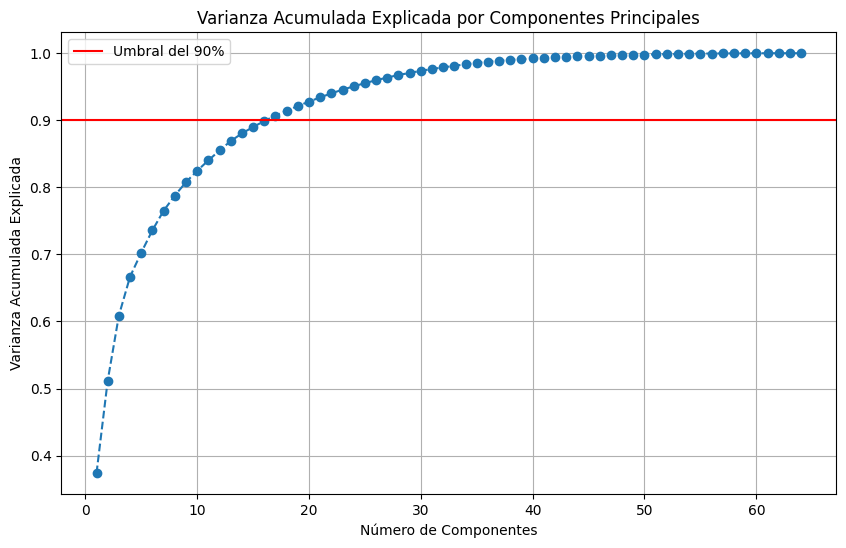


CP1 explica: 0.37 (37.37%) de la varianza total.
CP1 y CP2 juntos explican: 0.51 (51.16%) de la varianza total.

--- A. PCA con 2 Componentes Principales ---
Shape original: (43405, 64)
Shape PCA 2: (43405, 2)
Varianza total explicada (2 CP): 51.16%


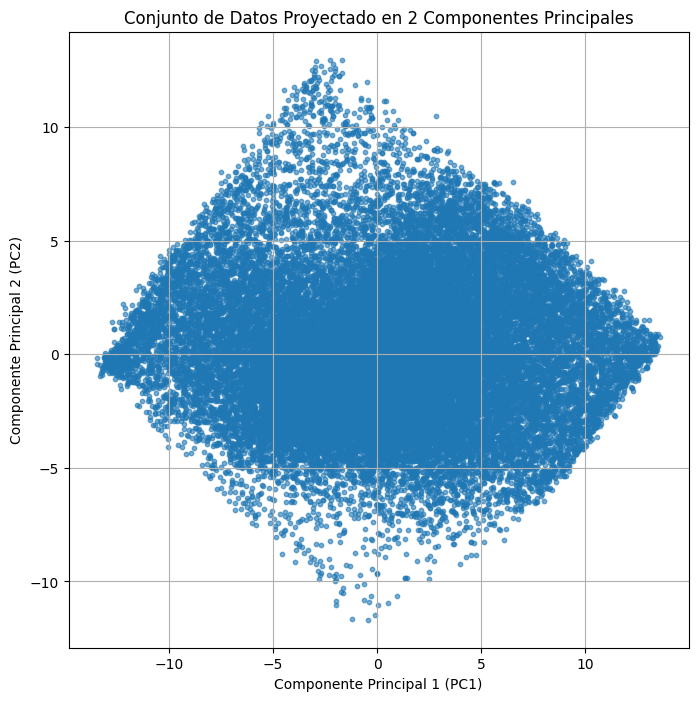


--- B. PCA con 3 Componentes Principales ---
Shape PCA 3: (43405, 3)
Varianza total explicada (3 CP): 60.88%


In [25]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# --- 1. PREPARACIÓN DE DATOS (Asumimos que X_scaled_df ya está listo) ---

# X_scaled_df debe ser el DataFrame de tus 64 variables estandarizadas.
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_X) 
num_vars = len(X_scaled_df.columns)

# --- 2. EVALUACIÓN Y SELECCIÓN DEL NÚMERO DE COMPONENTES ---

# Primero, ejecutamos PCA con el número máximo de componentes (todas las variables)
# para evaluar cuánta varianza explica cada uno.
print("Ejecutando PCA completo para evaluar la varianza...")
pca_full = PCA(n_components=None) # n_components=None usa todas las variables
pca_full.fit(X_scaled_df)

# Varianza Explicada Acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-', label='Umbral del 90%')
plt.legend(loc='best')
plt.show()

# 💡 Interpretación de los dos primeros componentes:
# Porcentaje de varianza explicada por el CP1:
print(f"\nCP1 explica: {pca_full.explained_variance_ratio_[0]:.2f} ({pca_full.explained_variance_ratio_[0]*100:.2f}%) de la varianza total.")
# Porcentaje de varianza explicada por el CP1 y CP2:
print(f"CP1 y CP2 juntos explican: {cumulative_variance[1]:.2f} ({cumulative_variance[1]*100:.2f}%) de la varianza total.")


# --- 3. PCA DE 2 COMPONENTES (Para Visualización y Modelos Ligeros) ---

print("\n--- A. PCA con 2 Componentes Principales ---")
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_df)

# Convertir el resultado a DataFrame para fácil manejo
X_pca_2_df = pd.DataFrame(data = X_pca_2, columns = ['PC1', 'PC2'])

print("Shape original:", X_scaled_df.shape)
print("Shape PCA 2:", X_pca_2_df.shape)
print(f"Varianza total explicada (2 CP): {pca_2.explained_variance_ratio_.sum()*100:.2f}%")

# 📊 Visualización de los datos proyectados en 2D:
plt.figure(figsize=(8,8))
plt.scatter(X_pca_2_df['PC1'], X_pca_2_df['PC2'], alpha=0.6, s=10)
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.title('Conjunto de Datos Proyectado en 2 Componentes Principales')
plt.grid()
plt.show()


# --- 4. PCA DE 3 COMPONENTES (Para Modelos más Robustos) ---

print("\n--- B. PCA con 3 Componentes Principales ---")
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled_df)

# Convertir el resultado a DataFrame
X_pca_3_df = pd.DataFrame(data = X_pca_3, columns = ['PC1', 'PC2', 'PC3'])

print("Shape PCA 3:", X_pca_3_df.shape)
print(f"Varianza total explicada (3 CP): {pca_3.explained_variance_ratio_.sum()*100:.2f}%")

# 💡 X_pca_3_df es el DataFrame que usarías como input para tu modelo predictivo
# si quieres retener más varianza que con solo 2 componentes.

In [29]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- 1. PREPARACIÓN DE DATOS (Asumimos X_pca_2_df y X_pca_3_df existen) ---
# Se asume que X_pca_2_df (PC1, PC2) y X_pca_3_df (PC1, PC2, PC3) están definidos 
# y contienen los resultados del PCA de tus datos estandarizados.

# Si no están definidos, el código para crearlos es:
# columnas_X = [f'Attr{i}' for i in range(1, 65)]
# X_data = df_winsorizado[columnas_X].copy() 
# scaler = StandardScaler()
# X_scaled_df = pd.DataFrame(scaler.fit_transform(X_data), columns=columnas_X)
# pca_2 = PCA(n_components=2).fit(X_scaled_df)
# X_pca_2_df = pd.DataFrame(pca_2.transform(X_scaled_df), columns=['PC1', 'PC2'])
# pca_3 = PCA(n_components=3).fit(X_scaled_df)
# X_pca_3_df = pd.DataFrame(pca_3.transform(X_scaled_df), columns=['PC1', 'PC2', 'PC3'])


# --- 2. GENERAR GRÁFICOS INTERACTIVOS CON PLOTLY EXPRESS ---

print("\n--- Generando Gráficos Interactivos con Plotly Express ---")

### 2.1 Gráfico de Dispersión 2D (PC1 vs PC2)
print("Generando Scatter Plot 2D (PC1 vs PC2)...")
fig2D = px.scatter(
    X_pca_2_df, 
    x='PC1', 
    y='PC2', 
    title='Proyección de Datos en PC1 vs PC2 (PCA 2 Componentes)',
    template='plotly_white' # Un tema limpio
)
fig2D.show()

### 2.2 Gráfico de Dispersión 3D (PC1 vs PC2 vs PC3)
print("Generando Scatter Plot 3D (PC1 vs PC2 vs PC3)...")
fig3D = px.scatter_3d(
    X_pca_3_df, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    title='Proyección de Datos en 3 Componentes Principales (PCA 3 Componentes)',
    template='plotly_white',
    # Puedes ajustar el tamaño del marcador aquí si es necesario
    # Aquí un tamaño fijo que se aplica al marcador, si no se especifica una columna
    # symbol_size=5 
)
fig3D.show()

print("\nGráficos generados. ¡Son visibles e interactivos!")


--- Generando Gráficos Interactivos con Plotly Express ---
Generando Scatter Plot 2D (PC1 vs PC2)...


Generando Scatter Plot 3D (PC1 vs PC2 vs PC3)...



Gráficos generados. ¡Son visibles e interactivos!


In [25]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
# Asume que X_scaled_df y pca_2 existen de los pasos anteriores

# Creamos la matriz de cargas
loadings = pd.DataFrame(
    pca_2.components_.T, # .T para transponer y que las variables sean filas
    columns=[f'PC{i+1}' for i in range(pca_2.n_components_)], # Nombres de las columnas: PC1, PC2, etc.
    index=X_scaled_df.columns # Nombres de las filas: Attr1, Attr2, etc.
)

print("--- Matriz de Cargas (Loadings) para PC1 y PC2 ---")
# Mostramos las 10 variables con la carga más fuerte (en valor absoluto) en PC1
loadings['PC1_abs'] = loadings['PC1'].abs()
loadings['PC2_abs'] = loadings['PC2'].abs()

print("\n👑 Top 5 Variables que definen el Componente Principal 1 (PC1):")
print(loadings.sort_values(by='PC1_abs', ascending=False)[['PC1', 'PC2']].head(25))

print("\n👑 Top 5 Variables que definen el Componente Principal 2 (PC2):")
print(loadings.sort_values(by='PC2_abs', ascending=False)[['PC1', 'PC2']].head(25))

# Eliminamos las columnas temporales
loadings = loadings.drop(columns=['PC1_abs', 'PC2_abs'])

--- Matriz de Cargas (Loadings) para PC1 y PC2 ---

👑 Top 5 Variables que definen el Componente Principal 1 (PC1):
             PC1       PC2
Attr12  0.180460 -0.067371
Attr14  0.175925 -0.145640
Attr7   0.175922 -0.145585
Attr18  0.175893 -0.145724
Attr16  0.175489 -0.016204
Attr1   0.174006 -0.145831
Attr26  0.173881 -0.016458
Attr19  0.171102 -0.141029
Attr11  0.169349 -0.153090
Attr23  0.169332 -0.141514
Attr31  0.163652 -0.141987
Attr22  0.159135 -0.161900
Attr24  0.156378 -0.071969
Attr42  0.153082 -0.162532
Attr35  0.151804 -0.153993
Attr13  0.150246 -0.121449
Attr48  0.147219 -0.153579
Attr45  0.146738 -0.119878
Attr10  0.146071  0.161734
Attr2  -0.144869 -0.163442
Attr49  0.144739 -0.153672
Attr39  0.144542 -0.152706
Attr3   0.143047  0.155795
Attr50  0.142355  0.184224
Attr30 -0.142120 -0.145642

👑 Top 5 Variables que definen el Componente Principal 2 (PC2):
             PC1       PC2
Attr4   0.139066  0.189697
Attr17  0.134168  0.188812
Attr8   0.135316  0.188392
Attr50  0.1

### Parte 3: Selección de Variables y Transformación Entropica (30%)
#### Poder Predictivo con SelectKBest (10%)

##### - Describir el método SelectKBest y cómo puede ser utilizado para seleccionar variables con mayor poder predictivo.

##### - Aplicar SelectKBest para seleccionar las 'K' mejores variables basándose en un criterio estadístico específico (p.ej., ,f regression, f_classif, chi-cuadrado) por default 7 variables. 



#### Describir el método SelectKBest y cómo puede ser utilizado para seleccionar variables con mayor poder predictivo.


**El método SelectKBest**
 
es una técnica de selección de variables (Feature Selection) perteneciente a la categoría de métodos de filtro (Filter Methods). Su objetivo es seleccionar las K variables con las puntuaciones más altas según una métrica estadística univariada determinada. Es una forma sencilla y rápida de seleccionar variables con un fuerte poder predictivo individual hacia la variable objetivo (Target).


**¿Cómo funciona?** 
 
SelectKBest utiliza pruebas estadísticas para evaluar la relación entre cada variable explicativa (en el caso del data set los Attr_i) y la variable objetivo (Y, la variable 'class') de forma independiente.

El método sigue estos pasos:

1. Cálculo de la Puntuación: Calcula la puntuación estadística (ej., valor F, valor χ2) para cada variable explicativa Xi con respecto a la variable objetivo Y.

2. Cálculo del p-valor: Asocia un p-valor a cada puntuación, indicando la probabilidad de que la relación observada sea solo debida al azar.

3. Clasificación: Ordena todas las variables en función de su puntuación (o, alternativamente, por su p-valor).

4. Selección de K: El algoritmo selecciona las K variables con las mejores puntuaciones (más altas) o, lo que es equivalente, las K variables con los p-valores más bajos (mayor significancia estadística).

In [57]:
##### Aplicar SelectKBest para seleccionar las 'K' mejores variables basándose en un criterio estadístico específico (p.ej., ,f regression, f_classif, chi-cuadrado) por default 7 variables.

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- 1. PREPARACIÓN DE DATOS ---

# Definir la variable objetivo (Y) y las variables explicativas (X)
# **¡IMPORTANTE! Reemplaza 'nombre_de_tu_target' con el nombre real de la columna binaria (0 o 1)**
Y_target = df_winsorizado['class'] 

# Variables explicativas (todas las Attrs, excluyendo el target)
columnas_X = [col for col in df_winsorizado.columns if col.startswith('Attr')]
X = df_winsorizado[columnas_X]

# 2. Estandarizar X (Buena práctica, aunque F-test es menos sensible que PCA)
# Aplicamos la estandarización solo a las features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_X)


# --- 3. APLICAR SELECTKBEST ---

# Elegimos k=7, pero puedes ajustarlo según la necesidad.
K = 7

# Utilizamos f_classif (ANOVA F-test), ideal para features numéricas y target categórico
selector = SelectKBest(score_func=f_classif, k=K)

# Ajustar y transformar los datos
selector.fit(X_scaled_df, Y_target)

# --- 4. EXTRACCIÓN DE RESULTADOS Y VISUALIZACIÓN ---

# Obtener las puntuaciones (F-scores) y los p-valores
scores = pd.Series(selector.scores_, index=X_scaled_df.columns)
p_values = pd.Series(selector.pvalues_, index=X_scaled_df.columns)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'F_Score': scores,
    'P_Value': p_values
}).sort_values(by='F_Score', ascending=False)

# Obtener los nombres de las K mejores variables
selected_features = results_df.head(K).index.tolist()

# Mostrar la tabla de resultados de las K mejores
print(f"### 🎯 Top {K} Variables Seleccionadas por F-Score (Mayor Poder Predictivo) ###")
print(results_df.head(K).round(4))

# Mostrar la lista final de variables
print("\n--- Lista Final de Variables Seleccionadas ---")
print(selected_features)

### 🎯 Top 7 Variables Seleccionadas por F-Score (Mayor Poder Predictivo) ###
          F_Score  P_Value
Attr13  1095.0211      0.0
Attr39  1013.4810      0.0
Attr25   972.6884      0.0
Attr38   927.6196      0.0
Attr23   895.5515      0.0
Attr19   892.0224      0.0
Attr35   868.4981      0.0

--- Lista Final de Variables Seleccionadas ---
['Attr13', 'Attr39', 'Attr25', 'Attr38', 'Attr23', 'Attr19', 'Attr35']


### Transformación Entropica con IV y WoE (20%)

#### - Explicar los conceptos de Valor de Información (IV) y Peso de Evidencia (WoE).
#### - Implementar una función para calcular IV y WoE para las variables categóricas del conjunto de datos.
#### - Utilizar estos criterios para evaluar y seleccionar variables significativas para el modelo.


### *Peso de la evidencia (WoE)*

El Peso de la Evidencia (WoE) mide la fuerza de la separación entre la distribución de los "Buenos" (casos donde el evento objetivo no ocurrió, ej. clientes que pagaron un préstamo) y la distribución de los "Malos" (casos donde el evento objetivo sí ocurrió, ej. clientes que incumplieron un préstamo), para cada categoría o bin de una característica predictiva.

Es una transformación que se aplica a una característica (variable independiente) antes de usarla en un modelo predictivo, como la regresión logística.

**Definición Formal**

Para una categoría (o bin) i de una característica, el WoE se calcula como el logaritmo natural de la razón de la distribución de "Buenos" sobre la distribución de "Malos" dentro de esa categoría:

$$
WoE_i=  \ln \left( \frac{ \%\text{buenos}_i}{\%\text{Malos}_i} \right) 
$$

Donde:
$$
\%\text{Buenos}_i
$$
​	
es la proporción de "Buenos" en la categoría i respecto al total de "Buenos" en todo el conjunto de datos.

$$
\%\text{Malos}_i
$$
​	
es la proporción de "Malos" en la categoría i respecto al total de "Malos" en todo el conjunto de datos.

Interpretación

- WoE > 0: La categoría i tiene una proporción más alta de Buenos que la población general (es "buena" en términos de riesgo).

- WoE < 0: La categoría i tiene una proporción más alta de Malos que la población general (es "mala" o de alto riesgo).

- WoE = 0: La proporción de Buenos y Malos en la categoría es la misma que en la población general, indicando poco poder predictivo en esa categoría.


### *Valor de información(IV)*: 

**El Valor de Información (IV)** es una métrica que cuantifica el poder predictivo general de una característica predictiva (variable independiente) con respecto a la variable objetivo binaria (ej. default o no default).

El IV se calcula sumando el WoE de cada categoría multiplicado por la diferencia entre la distribución de "Buenos" y "Malos" de esa categoría.

**Definición Formal**

El IV es la suma ponderada de los WoE en todas las categorías (i) de la característica, donde el ponderador es la diferencia absoluta en las distribuciones:

$$IV = i=1 ∑ N (\%\text{Buenos}_i− \%\text{Malos}_i) × WoEi
​	$$
Donde N es el número de categorías o bins de la característica.





En resumen, primero se discretiza la columna (dependiendo de los buenos y malos), luego se calculan las proporciones y luego se calcula el WoE (porcentaje bueno en cada bin respecto de los buenos y lo mismos para los bins de los malos). Recuerda que cada WoE se repetirá para cada valor que corresponda con el grupo de la columna. Finalmente tienes un bin para cada elemnto de la columna. El iV calcula el poder predictivo paar la característica.

In [31]:
#### - Implementar una función para calcular IV y WoE para las variables categóricas del conjunto de datos.

import pandas as pd
import numpy as np

def calcular_woe_iv(df, feature, target, num_bins=10):
    """
    Calcula el Peso de la Evidencia (WoE) y el Valor de Información (IV)
    para una característica continua dada una variable objetivo binaria.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        feature (str): Nombre de la columna predictiva (continua).
        target (str): Nombre de la columna objetivo (binaria: 0 y 1).
        num_bins (int): Número de cuantiles (bins) a crear para la discretización.

    Returns:
        tuple: (pd.DataFrame con detalles de WoE/IV por bin, float con IV total)
    """

    # --- 1. Discretización (Binning) usando cuantiles (qcut) ---
    try:
        # Crea 'num_bins' contenedores (bins) con frecuencias de datos similares.
        # 'duplicates=drop' maneja los casos con muchos valores repetidos.
        df['Bin'] = pd.qcut(df[feature], q=num_bins, duplicates='drop', retbins=True)[0]
    except Exception as e:
        # Si qcut falla (ej. muchos NaNs o valores idénticos), lo trata como una sola categoría
        print(f"Advertencia: Fallo en qcut para {feature}. Se agrupará la variable completa. Error: {e}")
        df['Bin'] = 'Única Categoría'

    # --- 2. Agrupación y Conteo (Cálculo de Proporciones) ---
    df_agg = (
        df.groupby('Bin', observed= True)[target]
        .agg(['count', 'sum'])
        .rename(columns={'count': 'Total', 'sum': 'Malos_Count'})
    )
    df_agg['Buenos_Count'] = df_agg['Total'] - df_agg['Malos_Count']

    # Manejar el caso de división por cero (si no hay Buenos o Malos totales)
    if df_agg['Malos_Count'].sum() == 0 or df_agg['Buenos_Count'].sum() == 0:
        return pd.DataFrame(), 0.0

    # Totales para calcular la proporción (%)
    Total_Malos = df_agg['Malos_Count'].sum()
    Total_Buenos = df_agg['Buenos_Count'].sum()

    df_agg['%_Malos'] = df_agg['Malos_Count'] / Total_Malos
    df_agg['%_Buenos'] = df_agg['Buenos_Count'] / Total_Buenos

    # --- 3. Cálculo del WoE (Peso de la Evidencia) ---
    # Para evitar log(0), sumamos una constante pequeña (epsilon) si el porcentaje es cero.
    epsilon = 0.0000001
    df_agg['WoE'] = np.log(
        (df_agg['%_Buenos'] + epsilon) / (df_agg['%_Malos'] + epsilon)
    )

    # --- 4. Cálculo del IV (Valor de Información) ---
    df_agg['IV_Contribucion'] = (df_agg['%_Buenos'] - df_agg['%_Malos']) * df_agg['WoE']
    IV_Total = df_agg['IV_Contribucion'].sum()

    # Limpieza: Eliminar la columna temporal 'Bin' del DataFrame original si es necesario
    # Nota: Aquí no se elimina para mantener la función simple y autocontenida.

    return df_agg.reset_index(), IV_Total




In [32]:
## Ejemplo de uso de la función calcular_woe_iv

# 1. Crear el DataFrame de ejemplo
data = {
    'X1_Ratio': [0.4, 0.7, 0.8, 1.2, 1.5, 1.8, 2.0, 2.5, 3.0, 3.5],
    'X2_Valor': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'X3_Otro': [8, 7, 6, 5, 4, 3, 2, 1, 0, -1],
    'Class_Quiebra': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0] # 1=Malo (Quiebra), 0=Bueno
}
df = pd.DataFrame(data)

# 2. Variable Objetivo
TARGET = 'Class_Quiebra'

# 3. Aplicar la función a X1
print("--- Resultados para X1 (Ratio Financiero) ---")
woe_iv_x1, iv_x1 = calcular_woe_iv(df.copy(), 'X1_Ratio', TARGET, num_bins=2)
print(woe_iv_x1.to_markdown(index=False, numalign="left", stralign="left"))
print(f"\nIV Total para X1: {iv_x1:.4f}")

# 4. Aplicar la función a X2
print("\n--- Resultados para X2 (Otro Valor) ---")
woe_iv_x2, iv_x2 = calcular_woe_iv(df.copy(), 'X2_Valor', TARGET, num_bins=2)
print(woe_iv_x2.to_markdown(index=False, numalign="left", stralign="left"))
print(f"\nIV Total para X2: {iv_x2:.4f}")

--- Resultados para X1 (Ratio Financiero) ---
| Bin           | Total   | Malos_Count   | Buenos_Count   | %_Malos   | %_Buenos   | WoE       | IV_Contribucion   |
|:--------------|:--------|:--------------|:---------------|:----------|:-----------|:----------|:------------------|
| (0.399, 1.65] | 5       | 2             | 3              | 1         | 0.375      | -0.980829 | 0.613018          |
| (1.65, 3.5]   | 5       | 0             | 5              | 0         | 0.625      | 15.6481   | 9.78006           |

IV Total para X1: 10.3931

--- Resultados para X2 (Otro Valor) ---
| Bin          | Total   | Malos_Count   | Buenos_Count   | %_Malos   | %_Buenos   | WoE       | IV_Contribucion   |
|:-------------|:--------|:--------------|:---------------|:----------|:-----------|:----------|:------------------|
| (4.999, 9.5] | 5       | 2             | 3              | 1         | 0.375      | -0.980829 | 0.613018          |
| (9.5, 14.0]  | 5       | 0             | 5              | 0  

In [33]:
# aplicar el peso de la evidencia y el valor de la información al dataframe winsorizado
# 1. CREAR una copia del DataFrame winsorizado para no modificar el original
df = df_winsorizado.copy()

# 2. CONVERTIR la columna objetivo a tipo NUMÉRICO
#    Usamos pd.to_numeric() y 'coerce' para forzar la conversión.
#    Si hay valores no convertibles (ej. '?', 'NA'), se convertirán a NaN.
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [35]:
columnas_X = [f'Attr{i}' for i in range(1, 64)]

resultados_iv = {} 

for col in columnas_X:
    woe_iv, iv_total = calcular_woe_iv(df.copy(), col, 'class', num_bins=5)
    resultados_iv[col] = iv_total


df_ranking_iv = pd.DataFrame(
    list(resultados_iv.items()),
    columns=['Atributo', 'IV_Total']
)


df_ranking_iv = df_ranking_iv.sort_values(
    by='IV_Total',
    ascending=False
).reset_index(drop=True)


df_ranking_iv['IV_Total'] = df_ranking_iv['IV_Total'].apply(lambda x: f"{x:.3f}")

print(df_ranking_iv.to_markdown(index=True, numalign="left", stralign="left"))




|    | Atributo   | IV_Total   |
|:---|:-----------|:-----------|
| 0  | Attr26     | 0.627      |
| 1  | Attr16     | 0.621      |
| 2  | Attr13     | 0.548      |
| 3  | Attr24     | 0.529      |
| 4  | Attr27     | 0.52       |
| 5  | Attr46     | 0.508      |
| 6  | Attr12     | 0.502      |
| 7  | Attr15     | 0.491      |
| 8  | Attr23     | 0.449      |
| 9  | Attr39     | 0.441      |
| 10 | Attr19     | 0.437      |
| 11 | Attr35     | 0.42       |
| 12 | Attr31     | 0.418      |
| 13 | Attr1      | 0.416      |
| 14 | Attr18     | 0.415      |
| 15 | Attr14     | 0.415      |
| 16 | Attr7      | 0.415      |
| 17 | Attr25     | 0.414      |
| 18 | Attr41     | 0.406      |
| 19 | Attr6      | 0.401      |
| 20 | Attr38     | 0.379      |
| 21 | Attr45     | 0.358      |
| 22 | Attr8      | 0.358      |
| 23 | Attr10     | 0.357      |
| 24 | Attr11     | 0.349      |
| 25 | Attr17     | 0.348      |
| 26 | Attr2      | 0.347      |
| 27 | Attr51     | 0.326      |
| 28 | Att

In [36]:

columna = 'Attr1'  # Reemplaza con la columna que deseas analizar


print(f"\n--- Resultados para {columna} ---")
woe_iv_x1, iv_x1 = calcular_woe_iv(df, 'Attr1', 'class', num_bins=4)
print(woe_iv_x1.to_markdown(index=False, numalign="left", stralign="left"))
print(f"\nIV Total para {columna}: {iv_x1:.4f}")



--- Resultados para Attr1 ---
| Bin               | Total   | Malos_Count   | Buenos_Count   | %_Malos   | %_Buenos   | WoE        | IV_Contribucion   |
|:------------------|:--------|:--------------|:---------------|:----------|:-----------|:-----------|:------------------|
| (-0.187, 0.00343] | 10852   | 1045          | 9807           | 0.499761  | 0.237377   | -0.744479  | 0.195339          |
| (0.00343, 0.0497] | 10855   | 520           | 10335          | 0.248685  | 0.250157   | 0.00590365 | 8.69308e-06       |
| (0.0497, 0.13]    | 10847   | 257           | 10590          | 0.122908  | 0.25633    | 0.73503    | 0.0980691         |
| (0.13, 0.319]     | 10851   | 269           | 10582          | 0.128647  | 0.256136   | 0.688639   | 0.0877941         |

IV Total para Attr1: 0.3812


# Parte 4: Entregables y Documentación (20%)


**Creación de una Biblioteca con Funciones Personalizadas (10%)**

1. Desarrollar código en Python que incluye funciones para realizar VarClusHi, PCA, SelectKBest, y cálculo de IV y WoE.

2. Asegurar que la biblioteca sea modular y fácil de importar en otros proyectos.



In [ ]:
# Super imporrtante: Añadir la ruta del proyecto al path de búsqueda de módulos de Python

import os
import sys

# 1. Obtiene la ruta del directorio actual (e.g., '/Datos/Notebook/')
current_dir = os.getcwd()

# 2. Navega un nivel hacia arriba para obtener la raíz del proyecto (e.g., '/Datos/')
# Esta es la carpeta que contiene a 'libreria'
project_root = os.path.dirname(current_dir)

# 3. Añade la ruta raíz al path de búsqueda de Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Puedes imprimir el path para confirmar si es necesario
# print(sys.path) 

print(f"Ruta de proyecto añadida: {project_root}")

Ruta de proyecto añadida: /Users/alonsodariopizarrolagunas/Documents/Repositorio-Practica4


In [52]:
# Ya tenemos hechos los modulos con las funcionnes necesarios para el varclus. Vamos a importar la librería y a ejecutar el varclus sobre el dataframe winsorizado.import os

from libreria.varclus import ejecutar_varclus_analysis
from libreria.varclus import seleccionar_representantes_varclus
from libreria.PCA  import ejecutar_pca_analisis
from libreria.PCA  import graficar_pca_plotly
from libreria.selectBest import seleccionar_kbest_features



In [48]:
# 1. Definir las columnas y estandarizar los datos
columnas_X = [f'Attr{i}' for i in range(1, 65)]
X_data = df_winsorizado[columnas_X].copy() # Usamos el DataFrame winsorizado y limpio

--- 1. Preparación de Datos: Estandarización ---
Datos escalados. Variables originales: 64

--- 2. Evaluación PCA Completo ---


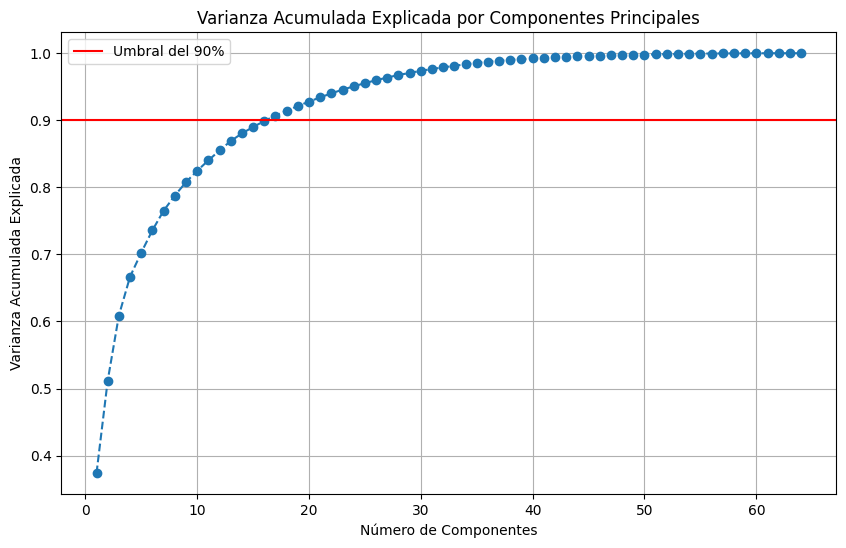

CP1 explica: 37.37% de la varianza total.
CP1 y CP2 juntos explican: 51.16% de la varianza total.

--- 3A. PCA con 2 Componentes Principales ---
Varianza total explicada (2 CP): 51.16%


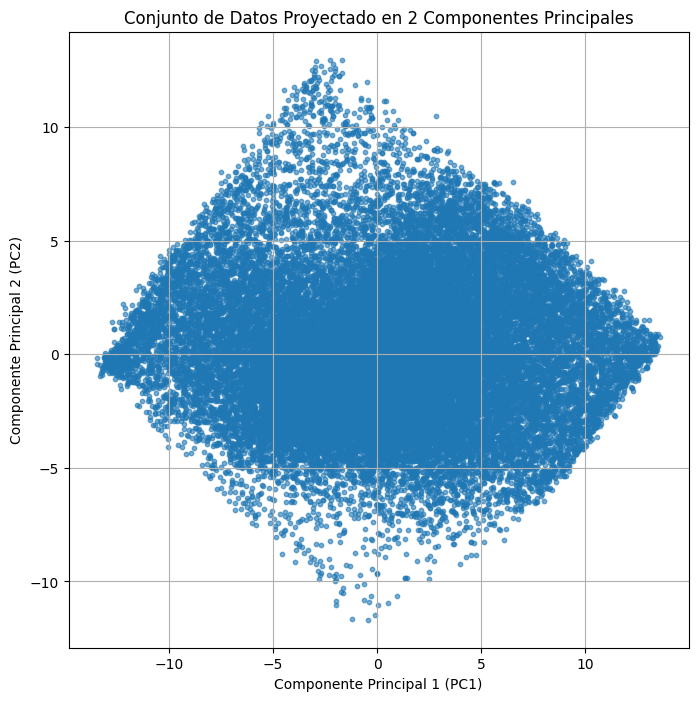


--- 3B. PCA con 3 Componentes Principales ---
Varianza total explicada (3 CP): 60.88%

Análisis PCA completado.


(             PC1       PC2
 0       4.097673 -2.608225
 1       3.601801 -3.260577
 2       3.806920 -7.087564
 3       1.349322  0.127402
 4       1.280429 -3.735134
 ...          ...       ...
 43400  -2.196832 -0.552879
 43401 -10.100362  1.610857
 43402  -7.695066 -3.893119
 43403  -7.674738  3.164344
 43404  -6.272417  2.242008
 
 [43405 rows x 2 columns],
              PC1       PC2       PC3
 0       4.097673 -2.608225 -1.708453
 1       3.601801 -3.260577 -1.570729
 2       3.806920 -7.087564 -2.577369
 3       1.349322  0.127402 -2.907247
 4       1.280429 -3.735134 -1.492399
 ...          ...       ...       ...
 43400  -2.196832 -0.552879  1.382201
 43401 -10.100362  1.610857  5.680423
 43402  -7.695066 -3.893119  0.078909
 43403  -7.674738  3.164344  0.296536
 43404  -6.272417  2.242008 -0.640125
 
 [43405 rows x 3 columns],
 None)

In [49]:
ejecutar_pca_analisis(X_data)

In [50]:
graficar_pca_plotly(X_pca_2_df, X_pca_3_df)


--- Generando Gráficos Interactivos con Plotly Express ---
Generando Scatter Plot 2D (PC1 vs PC2)...


Generando Scatter Plot 3D (PC1 vs PC2 vs PC3)...



Gráficos generados.


(Figure({
     'data': [{'hovertemplate': 'PC1=%{x}<br>PC2=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'showlegend': False,
               'type': 'scattergl',
               'x': {'bdata': ('KEUUSARkEEDPIgc8fdAMQIAZeq6SdA' ... 'hwv8cewO29Qnrush7AlJkJcfQWGcA='),
                     'dtype': 'f8'},
               'xaxis': 'x',
               'y': {'bdata': ('IzqGRKXdBMD/H+KEqRUKwNOStmqqWR' ... 'l1GyUPwJqil8+TUAlARh73BaLvAUA='),
                     'dtype': 'f8'},
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'template': '...',
                'title': {'text': 'Proyección de Datos en PC1 vs PC2 (PCA 2 Componentes)'},
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'PC1'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text':

In [53]:
Y_target = df_winsorizado['class'] 

# Variables explicativas (todas las Attrs, excluyendo el target)
columnas_X = [col for col in df_winsorizado.columns if col.startswith('Attr')]
X = df_winsorizado[columnas_X]

In [54]:
seleccionar_kbest_features(X, Y_target, k=7)

--- 1. Estandarizando las variables predictoras (X) ---
--- 2. Aplicando SelectKBest con K=7 y F-test ---

### 🎯 Top 7 Variables Seleccionadas por F-Score ###
          F_Score  P_Value
Attr13  1095.0211      0.0
Attr39  1013.4810      0.0
Attr25   972.6884      0.0
Attr38   927.6196      0.0
Attr23   895.5515      0.0
Attr19   892.0224      0.0
Attr35   868.4981      0.0

--- Lista Final de Variables Seleccionadas ---
['Attr13', 'Attr39', 'Attr25', 'Attr38', 'Attr23', 'Attr19', 'Attr35']


(['Attr13', 'Attr39', 'Attr25', 'Attr38', 'Attr23', 'Attr19', 'Attr35'],
             F_Score        P_Value
 Attr13  1095.021149  3.600896e-237
 Attr39  1013.480972  7.229879e-220
 Attr25   972.688445  3.370373e-211
 Attr38   927.619595  1.302154e-201
 Attr23   895.551531  8.757410e-195
 ...             ...            ...
 Attr44     2.986088   8.398996e-02
 Attr47     2.059772   1.512400e-01
 Attr9      0.782009   3.765323e-01
 Attr64     0.506789   4.765361e-01
 Attr59     0.043332   8.351015e-01
 
 [64 rows x 2 columns])

--- 1. Estandarización de Datos ---
Datos escalados. Variables: 64

--- 2. Ejecutando VarClusHi (Grupos de Variables) ---
Análisis VarClusHi completado. Grupos identificados.

--- 3. Generando Dendrograma de Agrupación Jerárquica ---


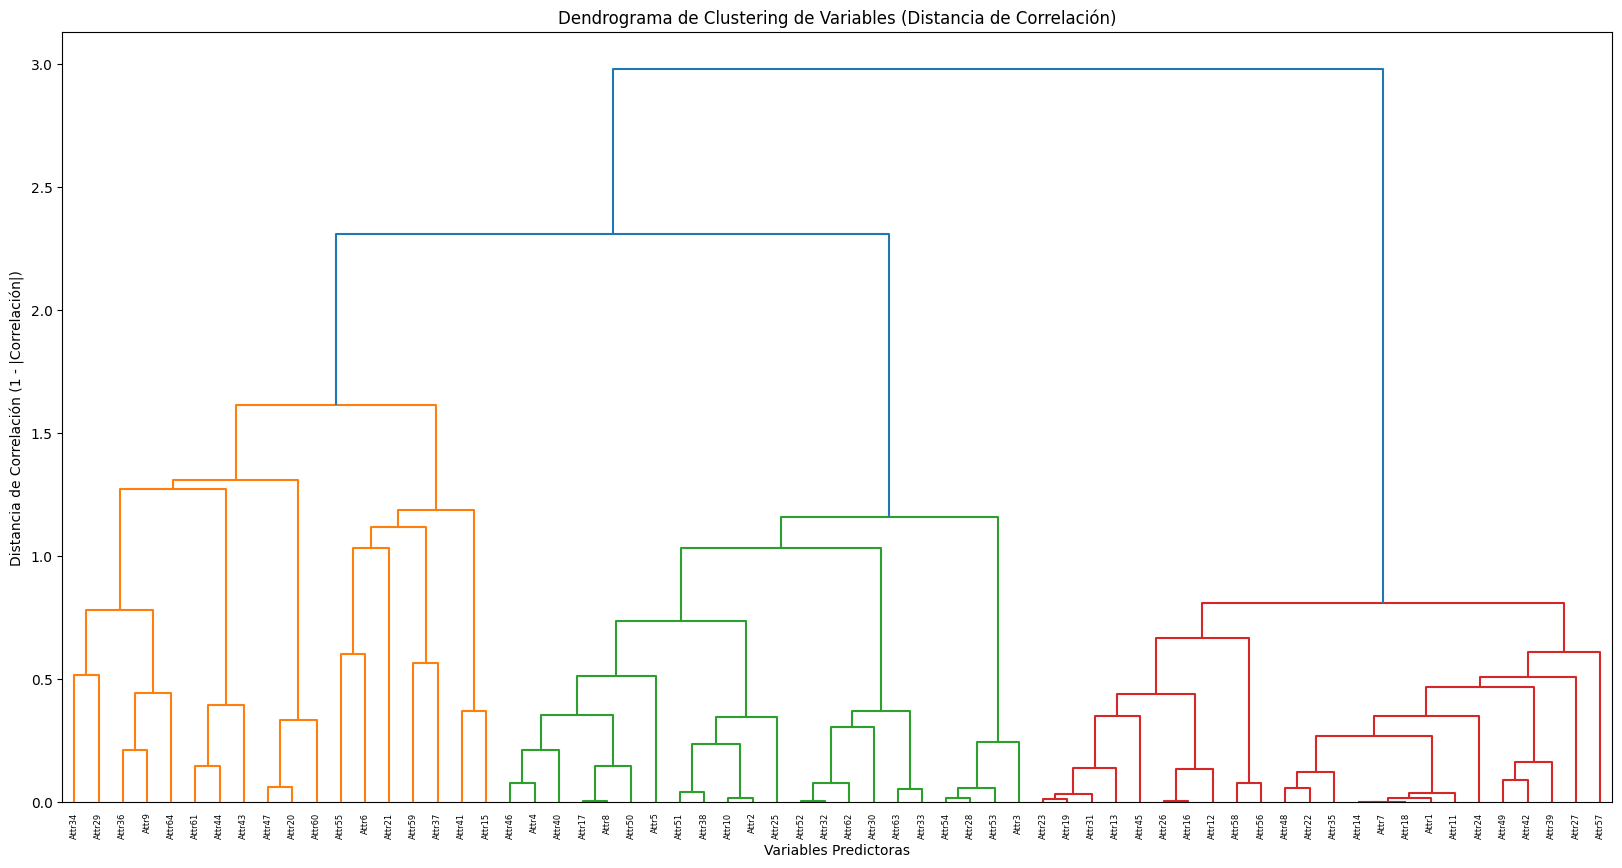


--- 4. Estructura de Grupos Finales (vc.info) ---
   Cluster N_Vars    Eigval1   Eigval2   VarProp
0        0     16  11.567160  0.980586  0.722948
1        1      6   4.523000  0.762609  0.753833
2        2      4   3.140927  0.469040  0.785232
3        3      6   5.035538  0.483411  0.839256
4        4      4   3.641534  0.278863  0.910383
5        5      9   7.070788  0.942230  0.785643
6        6      2   1.628512  0.371488  0.814256
7        7      2   1.853015  0.146985  0.926507
8        8      3   1.771346  0.713220  0.590449
9        9      2   1.435064  0.564936  0.717532
10      10      2   1.787143  0.212857  0.893571
11      11      7   5.562350  0.630953  0.794621
12      12      1   1.000000  0.000000  1.000000


(<varclushi.varclushi.VarClusHi at 0x1692c8680>,
    Cluster N_Vars    Eigval1   Eigval2   VarProp
 0        0     16  11.567160  0.980586  0.722948
 1        1      6   4.523000  0.762609  0.753833
 2        2      4   3.140927  0.469040  0.785232
 3        3      6   5.035538  0.483411  0.839256
 4        4      4   3.641534  0.278863  0.910383
 5        5      9   7.070788  0.942230  0.785643
 6        6      2   1.628512  0.371488  0.814256
 7        7      2   1.853015  0.146985  0.926507
 8        8      3   1.771346  0.713220  0.590449
 9        9      2   1.435064  0.564936  0.717532
 10      10      2   1.787143  0.212857  0.893571
 11      11      7   5.562350  0.630953  0.794621
 12      12      1   1.000000  0.000000  1.000000)

In [55]:
X_data.head()

ejecutar_varclus_analysis(X_data)

In [56]:
seleccionar_representantes_varclus(vc)


--- 1. Extrayendo Resultados y Ordenando por RS_Own ---
--- 2. Filtrando la variable con el RS_Own más alto por cada Cluster ---

### 🎯 Variables Representantes por Grupo (RS_Own Máximo) ###
    Cluster Variable  RS_Own
0         0   Attr14  0.9327
1         1    Attr2  0.9142
2         2   Attr20  0.9167
3         3   Attr52  0.9135
4         4   Attr54  0.9661
5         5   Attr19  0.8972
6         6   Attr15  0.8143
7         7   Attr44  0.9265
8         8   Attr29  0.6599
9         9   Attr37  0.7175
10       10    Attr9  0.8936
11       11    Attr4  0.8947
12       12    Attr6  1.0000

### Lista Final de Variables Representantes Seleccionadas ###
['Attr14', 'Attr2', 'Attr20', 'Attr52', 'Attr54', 'Attr19', 'Attr15', 'Attr44', 'Attr29', 'Attr37', 'Attr9', 'Attr4', 'Attr6']


(['Attr14',
  'Attr2',
  'Attr20',
  'Attr52',
  'Attr54',
  'Attr19',
  'Attr15',
  'Attr44',
  'Attr29',
  'Attr37',
  'Attr9',
  'Attr4',
  'Attr6'],
     Cluster Variable    RS_Own
 0         0   Attr14  0.932741
 1         1    Attr2  0.914166
 2         2   Attr20  0.916651
 3         3   Attr52  0.913493
 4         4   Attr54  0.966078
 5         5   Attr19  0.897168
 6         6   Attr15  0.814256
 7         7   Attr44  0.926507
 8         8   Attr29  0.659935
 9         9   Attr37  0.717532
 10       10    Attr9  0.893571
 11       11    Attr4  0.894722
 12       12    Attr6  1.000000)